`Project 03`



## <center> Guia de Modelagem Preditiva com Python e TensorFlow </center>


* Criado pela equipe do Google Brain, o TensorFlow é uma biblioteca de código aberto para computação numérica e machine learning em larga escala. 
* O TensorFlow reúne uma série de modelos e algoritmos de machine learning e aprendizagem profunda (também conhecido como redes neurais) e os torna úteis por meio de uma metáfora comum. 
* Ele usa o Python para fornecer uma API de front-end (o que aparece na tela) conveniente para criar aplicativos com a estrutura, enquanto executa esses aplicativos em C ++ de alto desempenho.

* O TensorFlow pode treinar e executar redes neurais profundas para classificação manuscrita de dígitos, reconhecimento de imagens, incorporação de palavras, redes neurais recorrentes, modelos seqüência a sequência para tradução automática, processamento de linguagem natural e simulações baseadas em equações diferenciais parciais. 
* O melhor de tudo, o TensorFlow suporta previsão de produção em escala, com os mesmos modelos usados para treinamento.

In [1]:
from platform import python_version
print(f"Versão Python: {python_version()}")

Versão Python: 3.8.12


In [2]:
# Instalando o TensorFlow
!pip install -q tensorflow==2.5

In [3]:
# Instala o Pydot (permite criar a árvore representando o grafo computacional do modelo)
!pip install -q pydot

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.3.0


###  Carregando o Dataset


### <font color="blue"> Boston House Prices Dataset </font>

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


#### Características:

Número de Observções: 506
- Os primeiros 13 recursos são recursos preditivos numéricos / categóricos.
- O último (atributo 14): o valor mediano é a variável de destino/ preditora.


Créditos: DSA - Curso Python Fundamentos para Análise de Dados.

In [5]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [6]:
# Esse conjunto de dados não traz o título das colunas de forma organizada, então vou criar uma lista com título de cada coluna
# para depois fazer a importação do dataset
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [7]:
# Carregando o dataset
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [8]:
# Tamanho do dataset
dataset.shape

(506, 14)

In [9]:
# Visualizando os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Dividindo os dados em Treino e Teste com proporção ==> 80/20

In [10]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## <font color = "purple"> Modelagem Preditiva - Regressão Linear Simples </font>

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente (x): 'RM' --- número médio de cômodos por habitação
* Variável dependente (y): 'MEDV' --- Valor da mediana das casas ocupadas pelo proprietário

Queremos prever o valor da mediana das casas ocupadas por proprietários (y) com base no número de quartos(x).


Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.
                   ** y = f(x)

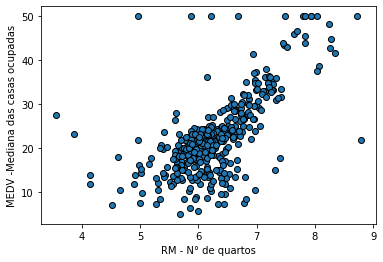

In [11]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM - N° de quartos')
ax.set_ylabel('MEDV -Mediana das casas ocupadas')
plt.show()

In [12]:
# Separando x e y:
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [13]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [14]:
# Cria o modelo 
modelo = modelo_linear()

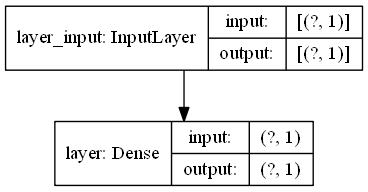

In [15]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

### <font color = "blue"> Treinamento do Modelo: </font>

In [16]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [17]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [18]:
# Lista para as previsões
predictions_list = []

In [19]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [20]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [21]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [22]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 0s 67ms/step - loss: 778.6371 - mae: 26.3944 - mse: 778.6371 - val_loss: 877.5713 - val_mae: 27.6799 - val_mse: 877.5713
Epoch 2/4000
2/2 [==============================] - 0s 7ms/step - loss: 770.7491 - mae: 26.2488 - mse: 770.7491 - val_loss: 869.3753 - val_mae: 27.5340 - val_mse: 869.3753
Epoch 3/4000
2/2 [==============================] - 0s 8ms/step - loss: 763.0394 - mae: 26.1037 - mse: 763.0394 - val_loss: 861.2247 - val_mae: 27.3881 - val_mse: 861.2247
Epoch 4/4000
2/2 [==============================] - 0s 8ms/step - loss: 755.2686 - mae: 25.9582 - mse: 755.2686 - val_loss: 853.1273 - val_mae: 27.2424 - val_mse: 853.1273
Epoch 5/4000
2/2 [==============================] - 0s 8ms/step - loss: 747.5923 - mae: 25.8132 - mse: 747.5923 - val_loss: 845.0778 - val_mae: 27.0968 - val_mse: 845.0778
Epoch 6/4000
2/2 [==============================] - 0s 8ms/step - loss: 740.0015 - mae: 25.6683 - mse: 740.0015 - val_loss: 837.0826 - val_

Epoch 48/4000
2/2 [==============================] - 0s 9ms/step - loss: 467.9748 - mae: 19.8394 - mse: 467.9748 - val_loss: 551.1414 - val_mae: 21.1115 - val_mse: 551.1414
Epoch 49/4000
2/2 [==============================] - 0s 7ms/step - loss: 462.6322 - mae: 19.7090 - mse: 462.6322 - val_loss: 545.5314 - val_mae: 20.9809 - val_mse: 545.5314
Epoch 50/4000
2/2 [==============================] - 0s 7ms/step - loss: 457.3998 - mae: 19.5788 - mse: 457.3998 - val_loss: 539.9620 - val_mae: 20.8504 - val_mse: 539.9620
Epoch 51/4000
2/2 [==============================] - 0s 7ms/step - loss: 452.1967 - mae: 19.4488 - mse: 452.1967 - val_loss: 534.4413 - val_mae: 20.7203 - val_mse: 534.4413
Epoch 52/4000
2/2 [==============================] - 0s 7ms/step - loss: 446.9566 - mae: 19.3193 - mse: 446.9566 - val_loss: 528.9671 - val_mae: 20.5904 - val_mse: 528.9671
Epoch 53/4000
2/2 [==============================] - 0s 7ms/step - loss: 441.8501 - mae: 19.1898 - mse: 441.8501 - val_loss: 523.5193 -

2/2 [==============================] - 0s 6ms/step - loss: 264.9828 - mae: 14.0816 - mse: 264.9828 - val_loss: 334.5138 - val_mae: 15.3523 - val_mse: 334.5138
Epoch 96/4000
2/2 [==============================] - 0s 7ms/step - loss: 261.6746 - mae: 13.9707 - mse: 261.6746 - val_loss: 330.9075 - val_mae: 15.2425 - val_mse: 330.9075
Epoch 97/4000
2/2 [==============================] - 0s 8ms/step - loss: 258.3634 - mae: 13.8604 - mse: 258.3634 - val_loss: 327.3427 - val_mae: 15.1331 - val_mse: 327.3427
Epoch 98/4000
2/2 [==============================] - 0s 7ms/step - loss: 255.1489 - mae: 13.7503 - mse: 255.1489 - val_loss: 323.8185 - val_mae: 15.0242 - val_mse: 323.8185
Epoch 99/4000
2/2 [==============================] - 0s 6ms/step - loss: 251.8581 - mae: 13.6404 - mse: 251.8581 - val_loss: 320.3429 - val_mae: 14.9159 - val_mse: 320.3429
Epoch 100/4000
2/2 [==============================] - 0s 6ms/step - loss: 248.7662 - mae: 13.5324 - mse: 248.7662 - val_loss: 316.8973 - val_mae: 14.

Epoch 142/4000
2/2 [==============================] - 0s 6ms/step - loss: 144.1761 - mae: 9.5532 - mse: 144.1761 - val_loss: 202.0136 - val_mae: 11.0126 - val_mse: 202.0136
Epoch 143/4000
2/2 [==============================] - 0s 6ms/step - loss: 142.3169 - mae: 9.4730 - mse: 142.3169 - val_loss: 199.9392 - val_mae: 10.9381 - val_mse: 199.9392
Epoch 144/4000
2/2 [==============================] - 0s 6ms/step - loss: 140.4994 - mae: 9.3954 - mse: 140.4994 - val_loss: 197.8906 - val_mae: 10.8637 - val_mse: 197.8906
Epoch 145/4000
2/2 [==============================] - 0s 6ms/step - loss: 138.6695 - mae: 9.3158 - mse: 138.6695 - val_loss: 195.8671 - val_mae: 10.7896 - val_mse: 195.8671
Epoch 146/4000
2/2 [==============================] - 0s 6ms/step - loss: 136.9449 - mae: 9.2400 - mse: 136.9449 - val_loss: 193.8620 - val_mae: 10.7154 - val_mse: 193.8620
Epoch 147/4000
2/2 [==============================] - 0s 6ms/step - loss: 135.1564 - mae: 9.1627 - mse: 135.1564 - val_loss: 191.8901 -

Epoch 190/4000
2/2 [==============================] - 0s 7ms/step - loss: 82.2486 - mae: 6.7096 - mse: 82.2486 - val_loss: 130.3631 - val_mae: 8.2365 - val_mse: 130.3631
Epoch 191/4000
2/2 [==============================] - 0s 7ms/step - loss: 81.4335 - mae: 6.6678 - mse: 81.4335 - val_loss: 129.4248 - val_mae: 8.1999 - val_mse: 129.4248
Epoch 192/4000
2/2 [==============================] - 0s 6ms/step - loss: 80.6845 - mae: 6.6266 - mse: 80.6845 - val_loss: 128.4988 - val_mae: 8.1633 - val_mse: 128.4988
Epoch 193/4000
2/2 [==============================] - 0s 6ms/step - loss: 79.9574 - mae: 6.5861 - mse: 79.9574 - val_loss: 127.5880 - val_mae: 8.1268 - val_mse: 127.5880
Epoch 194/4000
2/2 [==============================] - 0s 6ms/step - loss: 79.2543 - mae: 6.5488 - mse: 79.2543 - val_loss: 126.6988 - val_mae: 8.0908 - val_mse: 126.6988
Epoch 195/4000
2/2 [==============================] - 0s 6ms/step - loss: 78.5247 - mae: 6.5077 - mse: 78.5247 - val_loss: 125.8356 - val_mae: 8.0554 

Epoch 238/4000
2/2 [==============================] - 0s 7ms/step - loss: 60.2610 - mae: 5.4535 - mse: 60.2610 - val_loss: 101.5589 - val_mae: 7.0485 - val_mse: 101.5589
Epoch 239/4000
2/2 [==============================] - 0s 6ms/step - loss: 60.0804 - mae: 5.4433 - mse: 60.0804 - val_loss: 101.2474 - val_mae: 7.0388 - val_mse: 101.2474
Epoch 240/4000
2/2 [==============================] - 0s 6ms/step - loss: 59.8745 - mae: 5.4321 - mse: 59.8745 - val_loss: 100.9471 - val_mae: 7.0294 - val_mse: 100.9471
Epoch 241/4000
2/2 [==============================] - ETA: 0s - loss: 53.6624 - mae: 5.2952 - mse: 53.662 - 0s 6ms/step - loss: 59.6761 - mae: 5.4212 - mse: 59.6761 - val_loss: 100.6508 - val_mae: 7.0199 - val_mse: 100.6508
Epoch 242/4000
2/2 [==============================] - 0s 6ms/step - loss: 59.4988 - mae: 5.4126 - mse: 59.4988 - val_loss: 100.3543 - val_mae: 7.0115 - val_mse: 100.3543
Epoch 243/4000
2/2 [==============================] - 0s 7ms/step - loss: 59.3120 - mae: 5.4017 

2/2 [==============================] - 0s 6ms/step - loss: 56.0672 - mae: 5.3017 - mse: 56.0672 - val_loss: 93.7439 - val_mae: 6.8394 - val_mse: 93.7439
Epoch 287/4000
2/2 [==============================] - 0s 6ms/step - loss: 56.0438 - mae: 5.3021 - mse: 56.0438 - val_loss: 93.6833 - val_mae: 6.8390 - val_mse: 93.6833
Epoch 288/4000
2/2 [==============================] - 0s 6ms/step - loss: 56.0285 - mae: 5.3028 - mse: 56.0285 - val_loss: 93.6207 - val_mae: 6.8387 - val_mse: 93.6207
Epoch 289/4000
2/2 [==============================] - 0s 6ms/step - loss: 56.0039 - mae: 5.3032 - mse: 56.0039 - val_loss: 93.5591 - val_mae: 6.8383 - val_mse: 93.5591
Epoch 290/4000
2/2 [==============================] - ETA: 0s - loss: 58.8931 - mae: 5.4357 - mse: 58.893 - 0s 6ms/step - loss: 55.9948 - mae: 5.3049 - mse: 55.9948 - val_loss: 93.4944 - val_mae: 6.8379 - val_mse: 93.4944
Epoch 291/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.9764 - mae: 5.3057 - mse: 55.9764 - val_loss

2/2 [==============================] - 0s 6ms/step - loss: 55.7163 - mae: 5.3420 - mse: 55.7163 - val_loss: 92.3249 - val_mae: 6.8274 - val_mse: 92.3249
Epoch 335/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.7110 - mae: 5.3418 - mse: 55.7110 - val_loss: 92.3261 - val_mae: 6.8273 - val_mse: 92.3261
Epoch 336/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.7084 - mae: 5.3416 - mse: 55.7084 - val_loss: 92.3223 - val_mae: 6.8272 - val_mse: 92.3223
Epoch 337/4000
2/2 [==============================] - 0s 7ms/step - loss: 55.7058 - mae: 5.3416 - mse: 55.7058 - val_loss: 92.3171 - val_mae: 6.8270 - val_mse: 92.3171
Epoch 338/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.7042 - mae: 5.3417 - mse: 55.7042 - val_loss: 92.3120 - val_mae: 6.8269 - val_mse: 92.3120
Epoch 339/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.7007 - mae: 5.3417 - mse: 55.7007 - val_loss: 92.3118 - val_mae: 6.8267 - val_mse: 92.3118
Epoch 3

Epoch 383/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.5666 - mae: 5.3436 - mse: 55.5666 - val_loss: 92.0700 - val_mae: 6.8185 - val_mse: 92.0700
Epoch 384/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.5633 - mae: 5.3432 - mse: 55.5633 - val_loss: 92.0702 - val_mae: 6.8183 - val_mse: 92.0702
Epoch 385/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.5584 - mae: 5.3429 - mse: 55.5584 - val_loss: 92.0620 - val_mae: 6.8180 - val_mse: 92.0620
Epoch 386/4000
2/2 [==============================] - 0s 7ms/step - loss: 55.5550 - mae: 5.3432 - mse: 55.5550 - val_loss: 92.0505 - val_mae: 6.8178 - val_mse: 92.0505
Epoch 387/4000
2/2 [==============================] - 0s 7ms/step - loss: 55.5509 - mae: 5.3435 - mse: 55.5509 - val_loss: 92.0445 - val_mae: 6.8175 - val_mse: 92.0445
Epoch 388/4000
2/2 [==============================] - 0s 7ms/step - loss: 55.5470 - mae: 5.3434 - mse: 55.5470 - val_loss: 92.0415 - val_mae: 6.8173 - val_mse: 

2/2 [==============================] - 0s 7ms/step - loss: 55.3459 - mae: 5.3318 - mse: 55.3459 - val_loss: 91.8724 - val_mae: 6.8062 - val_mse: 91.8724
Epoch 432/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.3479 - mae: 5.3344 - mse: 55.3479 - val_loss: 91.8363 - val_mae: 6.8056 - val_mse: 91.8363
Epoch 433/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.3388 - mae: 5.3357 - mse: 55.3388 - val_loss: 91.8168 - val_mae: 6.8052 - val_mse: 91.8168
Epoch 434/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.3408 - mae: 5.3372 - mse: 55.3408 - val_loss: 91.7984 - val_mae: 6.8048 - val_mse: 91.7984
Epoch 435/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.3294 - mae: 5.3372 - mse: 55.3294 - val_loss: 91.8035 - val_mae: 6.8046 - val_mse: 91.8035
Epoch 436/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.3232 - mae: 5.3361 - mse: 55.3232 - val_loss: 91.8102 - val_mae: 6.8043 - val_mse: 91.8102
Epoch 4

Epoch 480/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.0442 - mae: 5.3058 - mse: 55.0442 - val_loss: 91.8293 - val_mae: 6.7899 - val_mse: 91.8293
Epoch 481/4000
2/2 [==============================] - 0s 6ms/step - loss: 55.0290 - mae: 5.3040 - mse: 55.0290 - val_loss: 91.8190 - val_mae: 6.7895 - val_mse: 91.8190
Epoch 482/4000
2/2 [==============================] - 0s 8ms/step - loss: 55.0211 - mae: 5.3040 - mse: 55.0211 - val_loss: 91.7947 - val_mae: 6.7890 - val_mse: 91.7947
Epoch 483/4000
2/2 [==============================] - 0s 11ms/step - loss: 55.0142 - mae: 5.3047 - mse: 55.0142 - val_loss: 91.7557 - val_mae: 6.7884 - val_mse: 91.7557
Epoch 484/4000
2/2 [==============================] - 0s 9ms/step - loss: 55.0045 - mae: 5.3068 - mse: 55.0045 - val_loss: 91.6893 - val_mae: 6.7876 - val_mse: 91.6893
Epoch 485/4000
2/2 [==============================] - 0s 9ms/step - loss: 54.9957 - mae: 5.3102 - mse: 54.9957 - val_loss: 91.6309 - val_mae: 6.7868 - val_mse:

Epoch 529/4000
2/2 [==============================] - 0s 6ms/step - loss: 54.6516 - mae: 5.2912 - mse: 54.6516 - val_loss: 91.4209 - val_mae: 6.7675 - val_mse: 91.4209
Epoch 530/4000
2/2 [==============================] - 0s 6ms/step - loss: 54.6457 - mae: 5.2908 - mse: 54.6457 - val_loss: 91.4162 - val_mae: 6.7670 - val_mse: 91.4162
Epoch 531/4000
2/2 [==============================] - 0s 6ms/step - loss: 54.6341 - mae: 5.2899 - mse: 54.6341 - val_loss: 91.4414 - val_mae: 6.7668 - val_mse: 91.4414
Epoch 532/4000
2/2 [==============================] - 0s 6ms/step - loss: 54.6228 - mae: 5.2869 - mse: 54.6228 - val_loss: 91.4906 - val_mae: 6.7667 - val_mse: 91.4906
Epoch 533/4000
2/2 [==============================] - 0s 6ms/step - loss: 54.6155 - mae: 5.2831 - mse: 54.6155 - val_loss: 91.5397 - val_mae: 6.7665 - val_mse: 91.5397
Epoch 534/4000
2/2 [==============================] - 0s 6ms/step - loss: 54.6094 - mae: 5.2793 - mse: 54.6094 - val_loss: 91.5868 - val_mae: 6.7664 - val_mse: 

Epoch 578/4000
2/2 [==============================] - 0s 7ms/step - loss: 54.2245 - mae: 5.2480 - mse: 54.2245 - val_loss: 91.4315 - val_mae: 6.7446 - val_mse: 91.4315
Epoch 579/4000
2/2 [==============================] - 0s 7ms/step - loss: 54.2131 - mae: 5.2471 - mse: 54.2131 - val_loss: 91.4002 - val_mae: 6.7439 - val_mse: 91.4002
Epoch 580/4000
2/2 [==============================] - 0s 7ms/step - loss: 54.2188 - mae: 5.2490 - mse: 54.2188 - val_loss: 91.3594 - val_mae: 6.7432 - val_mse: 91.3594
Epoch 581/4000
2/2 [==============================] - 0s 7ms/step - loss: 54.1940 - mae: 5.2489 - mse: 54.1940 - val_loss: 91.3589 - val_mae: 6.7427 - val_mse: 91.3589
Epoch 582/4000
2/2 [==============================] - 0s 6ms/step - loss: 54.1825 - mae: 5.2483 - mse: 54.1825 - val_loss: 91.3245 - val_mae: 6.7420 - val_mse: 91.3245
Epoch 583/4000
2/2 [==============================] - 0s 7ms/step - loss: 54.1711 - mae: 5.2493 - mse: 54.1711 - val_loss: 91.2682 - val_mae: 6.7412 - val_mse: 

2/2 [==============================] - 0s 6ms/step - loss: 53.7943 - mae: 5.2516 - mse: 53.7943 - val_loss: 90.6493 - val_mae: 6.7167 - val_mse: 90.6493
Epoch 627/4000
2/2 [==============================] - 0s 6ms/step - loss: 53.7859 - mae: 5.2520 - mse: 53.7859 - val_loss: 90.6433 - val_mae: 6.7162 - val_mse: 90.6433
Epoch 628/4000
2/2 [==============================] - 0s 7ms/step - loss: 53.7793 - mae: 5.2518 - mse: 53.7793 - val_loss: 90.6479 - val_mae: 6.7158 - val_mse: 90.6479
Epoch 629/4000
2/2 [==============================] - 0s 6ms/step - loss: 53.7651 - mae: 5.2497 - mse: 53.7651 - val_loss: 90.6854 - val_mae: 6.7156 - val_mse: 90.6854
Epoch 630/4000
2/2 [==============================] - 0s 7ms/step - loss: 53.7519 - mae: 5.2456 - mse: 53.7519 - val_loss: 90.7364 - val_mae: 6.7155 - val_mse: 90.7364
Epoch 631/4000
2/2 [==============================] - 0s 6ms/step - loss: 53.7409 - mae: 5.2407 - mse: 53.7409 - val_loss: 90.7989 - val_mae: 6.7154 - val_mse: 90.7989
Epoch 6

Epoch 675/4000
2/2 [==============================] - 0s 6ms/step - loss: 53.3368 - mae: 5.2119 - mse: 53.3368 - val_loss: 90.5240 - val_mae: 6.6917 - val_mse: 90.5240
Epoch 676/4000
2/2 [==============================] - 0s 7ms/step - loss: 53.3299 - mae: 5.2129 - mse: 53.3299 - val_loss: 90.4987 - val_mae: 6.6910 - val_mse: 90.4987
Epoch 677/4000
2/2 [==============================] - 0s 6ms/step - loss: 53.3211 - mae: 5.2132 - mse: 53.3211 - val_loss: 90.4845 - val_mae: 6.6904 - val_mse: 90.4845
Epoch 678/4000
2/2 [==============================] - 0s 7ms/step - loss: 53.3135 - mae: 5.2137 - mse: 53.3135 - val_loss: 90.4521 - val_mae: 6.6897 - val_mse: 90.4521
Epoch 679/4000
2/2 [==============================] - 0s 7ms/step - loss: 53.3015 - mae: 5.2144 - mse: 53.3015 - val_loss: 90.4423 - val_mae: 6.6891 - val_mse: 90.4423
Epoch 680/4000
2/2 [==============================] - 0s 7ms/step - loss: 53.2924 - mae: 5.2145 - mse: 53.2924 - val_loss: 90.4248 - val_mae: 6.6884 - val_mse: 

2/2 [==============================] - 0s 6ms/step - loss: 52.8754 - mae: 5.1837 - mse: 52.8754 - val_loss: 90.1867 - val_mae: 6.6641 - val_mse: 90.1867
Epoch 724/4000
2/2 [==============================] - 0s 6ms/step - loss: 52.8676 - mae: 5.1873 - mse: 52.8676 - val_loss: 90.1156 - val_mae: 6.6631 - val_mse: 90.1156
Epoch 725/4000
2/2 [==============================] - 0s 7ms/step - loss: 52.8682 - mae: 5.1917 - mse: 52.8682 - val_loss: 90.0587 - val_mae: 6.6621 - val_mse: 90.0587
Epoch 726/4000
2/2 [==============================] - 0s 7ms/step - loss: 52.8571 - mae: 5.1942 - mse: 52.8571 - val_loss: 90.0410 - val_mae: 6.6615 - val_mse: 90.0410
Epoch 727/4000
2/2 [==============================] - 0s 7ms/step - loss: 52.8472 - mae: 5.1939 - mse: 52.8472 - val_loss: 90.0465 - val_mae: 6.6610 - val_mse: 90.0465
Epoch 728/4000
2/2 [==============================] - 0s 6ms/step - loss: 52.8364 - mae: 5.1925 - mse: 52.8364 - val_loss: 90.0541 - val_mae: 6.6605 - val_mse: 90.0541
Epoch 7

Epoch 772/4000
2/2 [==============================] - 0s 7ms/step - loss: 52.4487 - mae: 5.1534 - mse: 52.4487 - val_loss: 90.0359 - val_mae: 6.6388 - val_mse: 90.0359
Epoch 773/4000
2/2 [==============================] - 0s 6ms/step - loss: 52.4386 - mae: 5.1520 - mse: 52.4386 - val_loss: 90.0292 - val_mae: 6.6383 - val_mse: 90.0292
Epoch 774/4000
2/2 [==============================] - 0s 7ms/step - loss: 52.4309 - mae: 5.1516 - mse: 52.4309 - val_loss: 90.0278 - val_mae: 6.6378 - val_mse: 90.0278
Epoch 775/4000
2/2 [==============================] - 0s 6ms/step - loss: 52.4254 - mae: 5.1511 - mse: 52.4254 - val_loss: 90.0421 - val_mae: 6.6374 - val_mse: 90.0421
Epoch 776/4000
2/2 [==============================] - 0s 7ms/step - loss: 52.4143 - mae: 5.1488 - mse: 52.4143 - val_loss: 90.0855 - val_mae: 6.6372 - val_mse: 90.0855
Epoch 777/4000
2/2 [==============================] - 0s 6ms/step - loss: 52.4076 - mae: 5.1460 - mse: 52.4076 - val_loss: 90.1143 - val_mae: 6.6369 - val_mse: 

Epoch 821/4000
2/2 [==============================] - 0s 6ms/step - loss: 52.0352 - mae: 5.1315 - mse: 52.0352 - val_loss: 89.7103 - val_mae: 6.6130 - val_mse: 89.7103
Epoch 822/4000
2/2 [==============================] - 0s 6ms/step - loss: 52.0258 - mae: 5.1296 - mse: 52.0258 - val_loss: 89.7451 - val_mae: 6.6127 - val_mse: 89.7451
Epoch 823/4000
2/2 [==============================] - 0s 7ms/step - loss: 52.0252 - mae: 5.1267 - mse: 52.0252 - val_loss: 89.7897 - val_mae: 6.6126 - val_mse: 89.7897
Epoch 824/4000
2/2 [==============================] - 0s 9ms/step - loss: 52.0135 - mae: 5.1240 - mse: 52.0135 - val_loss: 89.8018 - val_mae: 6.6121 - val_mse: 89.8018
Epoch 825/4000
2/2 [==============================] - 0s 7ms/step - loss: 52.0066 - mae: 5.1223 - mse: 52.0066 - val_loss: 89.8226 - val_mae: 6.6118 - val_mse: 89.8226
Epoch 826/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.9984 - mae: 5.1207 - mse: 51.9984 - val_loss: 89.8220 - val_mae: 6.6113 - val_mse: 

Epoch 870/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.6250 - mae: 5.1082 - mse: 51.6250 - val_loss: 89.3931 - val_mae: 6.5867 - val_mse: 89.3931
Epoch 871/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.6157 - mae: 5.1067 - mse: 51.6157 - val_loss: 89.3825 - val_mae: 6.5862 - val_mse: 89.3825
Epoch 872/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.6133 - mae: 5.1073 - mse: 51.6133 - val_loss: 89.3608 - val_mae: 6.5855 - val_mse: 89.3608
Epoch 873/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.5988 - mae: 5.1070 - mse: 51.5988 - val_loss: 89.3715 - val_mae: 6.5851 - val_mse: 89.3715
Epoch 874/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.5906 - mae: 5.1056 - mse: 51.5906 - val_loss: 89.3801 - val_mae: 6.5847 - val_mse: 89.3801
Epoch 875/4000
2/2 [==============================] - 0s 10ms/step - loss: 51.5818 - mae: 5.1041 - mse: 51.5818 - val_loss: 89.4017 - val_mae: 6.5843 - val_mse:

Epoch 919/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.2449 - mae: 5.0689 - mse: 51.2449 - val_loss: 89.3756 - val_mae: 6.5629 - val_mse: 89.3756
Epoch 920/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.2294 - mae: 5.0700 - mse: 51.2294 - val_loss: 89.3324 - val_mae: 6.5622 - val_mse: 89.3324
Epoch 921/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.2228 - mae: 5.0720 - mse: 51.2228 - val_loss: 89.2707 - val_mae: 6.5613 - val_mse: 89.2707
Epoch 922/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.2215 - mae: 5.0744 - mse: 51.2215 - val_loss: 89.2341 - val_mae: 6.5606 - val_mse: 89.2341
Epoch 923/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.2001 - mae: 5.0744 - mse: 51.2001 - val_loss: 89.2403 - val_mae: 6.5602 - val_mse: 89.2403
Epoch 924/4000
2/2 [==============================] - 0s 6ms/step - loss: 51.1929 - mae: 5.0734 - mse: 51.1929 - val_loss: 89.2424 - val_mae: 6.5597 - val_mse: 

2/2 [==============================] - 0s 7ms/step - loss: 50.8534 - mae: 5.0641 - mse: 50.8534 - val_loss: 88.8475 - val_mae: 6.5362 - val_mse: 88.8475
Epoch 968/4000
2/2 [==============================] - 0s 7ms/step - loss: 50.8385 - mae: 5.0597 - mse: 50.8385 - val_loss: 88.8980 - val_mae: 6.5361 - val_mse: 88.8980
Epoch 969/4000
2/2 [==============================] - 0s 8ms/step - loss: 50.8343 - mae: 5.0561 - mse: 50.8343 - val_loss: 88.9567 - val_mae: 6.5360 - val_mse: 88.9567
Epoch 970/4000
2/2 [==============================] - 0s 9ms/step - loss: 50.8261 - mae: 5.0523 - mse: 50.8261 - val_loss: 89.0023 - val_mae: 6.5359 - val_mse: 89.0023
Epoch 971/4000
2/2 [==============================] - 0s 7ms/step - loss: 50.8213 - mae: 5.0493 - mse: 50.8213 - val_loss: 89.0434 - val_mae: 6.5357 - val_mse: 89.0434
Epoch 972/4000
2/2 [==============================] - 0s 7ms/step - loss: 50.8162 - mae: 5.0467 - mse: 50.8162 - val_loss: 89.0799 - val_mae: 6.5354 - val_mse: 89.0799
Epoch 9

Epoch 1016/4000
2/2 [==============================] - 0s 6ms/step - loss: 50.5008 - mae: 5.0233 - mse: 50.5008 - val_loss: 88.9065 - val_mae: 6.5142 - val_mse: 88.9065
Epoch 1017/4000
2/2 [==============================] - 0s 7ms/step - loss: 50.4943 - mae: 5.0229 - mse: 50.4943 - val_loss: 88.8887 - val_mae: 6.5136 - val_mse: 88.8887
Epoch 1018/4000
2/2 [==============================] - 0s 7ms/step - loss: 50.4859 - mae: 5.0228 - mse: 50.4859 - val_loss: 88.8556 - val_mae: 6.5129 - val_mse: 88.8556
Epoch 1019/4000
2/2 [==============================] - 0s 6ms/step - loss: 50.4742 - mae: 5.0240 - mse: 50.4742 - val_loss: 88.7882 - val_mae: 6.5121 - val_mse: 88.7882
Epoch 1020/4000
2/2 [==============================] - 0s 7ms/step - loss: 50.4725 - mae: 5.0268 - mse: 50.4725 - val_loss: 88.7221 - val_mae: 6.5112 - val_mse: 88.7221
Epoch 1021/4000
2/2 [==============================] - 0s 7ms/step - loss: 50.4549 - mae: 5.0285 - mse: 50.4549 - val_loss: 88.6854 - val_mae: 6.5105 - val

2/2 [==============================] - 0s 6ms/step - loss: 50.1450 - mae: 5.0075 - mse: 50.1450 - val_loss: 88.5751 - val_mae: 6.4899 - val_mse: 88.5751
Epoch 1065/4000
2/2 [==============================] - 0s 6ms/step - loss: 50.1396 - mae: 5.0054 - mse: 50.1396 - val_loss: 88.5955 - val_mae: 6.4895 - val_mse: 88.5955
Epoch 1066/4000
2/2 [==============================] - 0s 6ms/step - loss: 50.1344 - mae: 5.0040 - mse: 50.1344 - val_loss: 88.6093 - val_mae: 6.4892 - val_mse: 88.6093
Epoch 1067/4000
2/2 [==============================] - 0s 6ms/step - loss: 50.1310 - mae: 5.0028 - mse: 50.1310 - val_loss: 88.6252 - val_mae: 6.4889 - val_mse: 88.6252
Epoch 1068/4000
2/2 [==============================] - 0s 7ms/step - loss: 50.1236 - mae: 5.0016 - mse: 50.1236 - val_loss: 88.6061 - val_mae: 6.4883 - val_mse: 88.6061
Epoch 1069/4000
2/2 [==============================] - 0s 6ms/step - loss: 50.1163 - mae: 5.0021 - mse: 50.1163 - val_loss: 88.5620 - val_mae: 6.4876 - val_mse: 88.5620
Ep

2/2 [==============================] - 0s 6ms/step - loss: 49.7955 - mae: 4.9848 - mse: 49.7955 - val_loss: 88.3605 - val_mae: 6.4657 - val_mse: 88.3605
Epoch 1113/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.7895 - mae: 4.9828 - mse: 49.7895 - val_loss: 88.3955 - val_mae: 6.4659 - val_mse: 88.3955
Epoch 1114/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.7846 - mae: 4.9808 - mse: 49.7846 - val_loss: 88.4330 - val_mae: 6.4665 - val_mse: 88.4330
Epoch 1115/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.7808 - mae: 4.9784 - mse: 49.7808 - val_loss: 88.4777 - val_mae: 6.4672 - val_mse: 88.4777
Epoch 1116/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.7832 - mae: 4.9764 - mse: 49.7832 - val_loss: 88.5017 - val_mae: 6.4674 - val_mse: 88.5017
Epoch 1117/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.7742 - mae: 4.9752 - mse: 49.7742 - val_loss: 88.4772 - val_mae: 6.4664 - val_mse: 88.4772
Ep

2/2 [==============================] - 0s 7ms/step - loss: 49.4400 - mae: 4.9636 - mse: 49.4400 - val_loss: 88.0725 - val_mae: 6.4407 - val_mse: 88.0725
Epoch 1161/4000
2/2 [==============================] - 0s 7ms/step - loss: 49.4415 - mae: 4.9637 - mse: 49.4415 - val_loss: 88.0730 - val_mae: 6.4404 - val_mse: 88.0730
Epoch 1162/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.4457 - mae: 4.9632 - mse: 49.4457 - val_loss: 88.1033 - val_mae: 6.4408 - val_mse: 88.1033
Epoch 1163/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.4209 - mae: 4.9607 - mse: 49.4209 - val_loss: 88.0633 - val_mae: 6.4395 - val_mse: 88.0633
Epoch 1164/4000
2/2 [==============================] - 0s 7ms/step - loss: 49.4138 - mae: 4.9619 - mse: 49.4138 - val_loss: 88.0266 - val_mae: 6.4382 - val_mse: 88.0266
Epoch 1165/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.4104 - mae: 4.9633 - mse: 49.4104 - val_loss: 88.0090 - val_mae: 6.4375 - val_mse: 88.0090
Ep

2/2 [==============================] - 0s 6ms/step - loss: 49.1090 - mae: 4.9580 - mse: 49.1090 - val_loss: 87.5476 - val_mae: 6.4176 - val_mse: 87.5476
Epoch 1209/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.1013 - mae: 4.9564 - mse: 49.1013 - val_loss: 87.5768 - val_mae: 6.4165 - val_mse: 87.5768
Epoch 1210/4000
2/2 [==============================] - 0s 7ms/step - loss: 49.0933 - mae: 4.9541 - mse: 49.0933 - val_loss: 87.5926 - val_mae: 6.4157 - val_mse: 87.5926
Epoch 1211/4000
2/2 [==============================] - 0s 6ms/step - loss: 49.0826 - mae: 4.9527 - mse: 49.0826 - val_loss: 87.5939 - val_mae: 6.4151 - val_mse: 87.5939
Epoch 1212/4000
2/2 [==============================] - 0s 7ms/step - loss: 49.0740 - mae: 4.9518 - mse: 49.0740 - val_loss: 87.6122 - val_mae: 6.4145 - val_mse: 87.6122
Epoch 1213/4000
2/2 [==============================] - 0s 7ms/step - loss: 49.0645 - mae: 4.9497 - mse: 49.0645 - val_loss: 87.6527 - val_mae: 6.4142 - val_mse: 87.6527
Ep

2/2 [==============================] - 0s 7ms/step - loss: 48.7630 - mae: 4.9261 - mse: 48.7630 - val_loss: 87.5168 - val_mae: 6.3991 - val_mse: 87.5168
Epoch 1257/4000
2/2 [==============================] - 0s 7ms/step - loss: 48.7585 - mae: 4.9248 - mse: 48.7585 - val_loss: 87.5351 - val_mae: 6.3993 - val_mse: 87.5351
Epoch 1258/4000
2/2 [==============================] - 0s 8ms/step - loss: 48.7464 - mae: 4.9220 - mse: 48.7464 - val_loss: 87.5960 - val_mae: 6.4016 - val_mse: 87.5960
Epoch 1259/4000
2/2 [==============================] - 0s 8ms/step - loss: 48.7436 - mae: 4.9194 - mse: 48.7436 - val_loss: 87.6340 - val_mae: 6.4030 - val_mse: 87.6340
Epoch 1260/4000
2/2 [==============================] - 0s 8ms/step - loss: 48.7419 - mae: 4.9172 - mse: 48.7419 - val_loss: 87.6324 - val_mae: 6.4027 - val_mse: 87.6324
Epoch 1261/4000
2/2 [==============================] - 0s 11ms/step - loss: 48.7257 - mae: 4.9167 - mse: 48.7257 - val_loss: 87.5759 - val_mae: 6.4001 - val_mse: 87.5759
E

2/2 [==============================] - 0s 8ms/step - loss: 48.4268 - mae: 4.9002 - mse: 48.4268 - val_loss: 87.3036 - val_mae: 6.3817 - val_mse: 87.3036
Epoch 1305/4000
2/2 [==============================] - 0s 8ms/step - loss: 48.4193 - mae: 4.9026 - mse: 48.4193 - val_loss: 87.2455 - val_mae: 6.3801 - val_mse: 87.2455
Epoch 1306/4000
2/2 [==============================] - 0s 8ms/step - loss: 48.4121 - mae: 4.9043 - mse: 48.4121 - val_loss: 87.2011 - val_mae: 6.3788 - val_mse: 87.2011
Epoch 1307/4000
2/2 [==============================] - 0s 7ms/step - loss: 48.4081 - mae: 4.9060 - mse: 48.4081 - val_loss: 87.1679 - val_mae: 6.3778 - val_mse: 87.1679
Epoch 1308/4000
2/2 [==============================] - 0s 6ms/step - loss: 48.4008 - mae: 4.9066 - mse: 48.4008 - val_loss: 87.1521 - val_mae: 6.3771 - val_mse: 87.1521
Epoch 1309/4000
2/2 [==============================] - 0s 6ms/step - loss: 48.3950 - mae: 4.9069 - mse: 48.3950 - val_loss: 87.1382 - val_mae: 6.3765 - val_mse: 87.1382
Ep

2/2 [==============================] - 0s 7ms/step - loss: 48.1311 - mae: 4.8961 - mse: 48.1311 - val_loss: 86.8743 - val_mae: 6.3596 - val_mse: 86.8743
Epoch 1353/4000
2/2 [==============================] - 0s 8ms/step - loss: 48.1154 - mae: 4.8927 - mse: 48.1154 - val_loss: 86.9168 - val_mae: 6.3604 - val_mse: 86.9168
Epoch 1354/4000
2/2 [==============================] - 0s 6ms/step - loss: 48.1076 - mae: 4.8895 - mse: 48.1076 - val_loss: 86.9770 - val_mae: 6.3616 - val_mse: 86.9770
Epoch 1355/4000
2/2 [==============================] - 0s 6ms/step - loss: 48.0960 - mae: 4.8855 - mse: 48.0960 - val_loss: 87.0315 - val_mae: 6.3626 - val_mse: 87.0315
Epoch 1356/4000
2/2 [==============================] - 0s 6ms/step - loss: 48.0922 - mae: 4.8825 - mse: 48.0922 - val_loss: 87.0826 - val_mae: 6.3635 - val_mse: 87.0826
Epoch 1357/4000
2/2 [==============================] - 0s 6ms/step - loss: 48.0817 - mae: 4.8793 - mse: 48.0817 - val_loss: 87.1136 - val_mae: 6.3640 - val_mse: 87.1136
Ep

2/2 [==============================] - 0s 7ms/step - loss: 47.8098 - mae: 4.8605 - mse: 47.8098 - val_loss: 86.8722 - val_mae: 6.3475 - val_mse: 86.8722
Epoch 1401/4000
2/2 [==============================] - 0s 7ms/step - loss: 47.8027 - mae: 4.8622 - mse: 47.8027 - val_loss: 86.8342 - val_mae: 6.3463 - val_mse: 86.8342
Epoch 1402/4000
2/2 [==============================] - 0s 7ms/step - loss: 47.7959 - mae: 4.8630 - mse: 47.7959 - val_loss: 86.8068 - val_mae: 6.3454 - val_mse: 86.8068
Epoch 1403/4000
2/2 [==============================] - 0s 7ms/step - loss: 47.7975 - mae: 4.8648 - mse: 47.7975 - val_loss: 86.7785 - val_mae: 6.3445 - val_mse: 86.7785
Epoch 1404/4000
2/2 [==============================] - 0s 6ms/step - loss: 47.7849 - mae: 4.8644 - mse: 47.7849 - val_loss: 86.7905 - val_mae: 6.3445 - val_mse: 86.7905
Epoch 1405/4000
2/2 [==============================] - 0s 6ms/step - loss: 47.7807 - mae: 4.8635 - mse: 47.7807 - val_loss: 86.8078 - val_mae: 6.3446 - val_mse: 86.8078
Ep

Epoch 1448/4000
2/2 [==============================] - 0s 7ms/step - loss: 47.5130 - mae: 4.8487 - mse: 47.5130 - val_loss: 86.5803 - val_mae: 6.3283 - val_mse: 86.5803
Epoch 1449/4000
2/2 [==============================] - 0s 7ms/step - loss: 47.5076 - mae: 4.8458 - mse: 47.5076 - val_loss: 86.6315 - val_mae: 6.3292 - val_mse: 86.6315
Epoch 1450/4000
2/2 [==============================] - 0s 7ms/step - loss: 47.4954 - mae: 4.8429 - mse: 47.4954 - val_loss: 86.6729 - val_mae: 6.3299 - val_mse: 86.6729
Epoch 1451/4000
2/2 [==============================] - 0s 6ms/step - loss: 47.4979 - mae: 4.8404 - mse: 47.4979 - val_loss: 86.7178 - val_mae: 6.3307 - val_mse: 86.7178
Epoch 1452/4000
2/2 [==============================] - 0s 6ms/step - loss: 47.4866 - mae: 4.8379 - mse: 47.4866 - val_loss: 86.7221 - val_mae: 6.3306 - val_mse: 86.7221
Epoch 1453/4000
2/2 [==============================] - 0s 6ms/step - loss: 47.4784 - mae: 4.8372 - mse: 47.4784 - val_loss: 86.6962 - val_mae: 6.3297 - val

2/2 [==============================] - 0s 6ms/step - loss: 47.2429 - mae: 4.8199 - mse: 47.2429 - val_loss: 86.6150 - val_mae: 6.3178 - val_mse: 86.6150
Epoch 1497/4000
2/2 [==============================] - 0s 7ms/step - loss: 47.2369 - mae: 4.8185 - mse: 47.2369 - val_loss: 86.6165 - val_mae: 6.3175 - val_mse: 86.6165
Epoch 1498/4000
2/2 [==============================] - 0s 6ms/step - loss: 47.2333 - mae: 4.8180 - mse: 47.2333 - val_loss: 86.6053 - val_mae: 6.3171 - val_mse: 86.6053
Epoch 1499/4000
2/2 [==============================] - 0s 6ms/step - loss: 47.2286 - mae: 4.8181 - mse: 47.2286 - val_loss: 86.5705 - val_mae: 6.3160 - val_mse: 86.5705
Epoch 1500/4000
2/2 [==============================] - 0s 6ms/step - loss: 47.2203 - mae: 4.8188 - mse: 47.2203 - val_loss: 86.5524 - val_mae: 6.3154 - val_mse: 86.5524
Epoch 1501/4000
2/2 [==============================] - 0s 6ms/step - loss: 47.2254 - mae: 4.8201 - mse: 47.2254 - val_loss: 86.5275 - val_mae: 6.3146 - val_mse: 86.5275
Ep

2/2 [==============================] - 0s 6ms/step - loss: 46.9866 - mae: 4.8024 - mse: 46.9866 - val_loss: 86.4990 - val_mae: 6.3040 - val_mse: 86.4990
Epoch 1545/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.9811 - mae: 4.7996 - mse: 46.9811 - val_loss: 86.5704 - val_mae: 6.3053 - val_mse: 86.5704
Epoch 1546/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.9838 - mae: 4.7965 - mse: 46.9838 - val_loss: 86.6458 - val_mae: 6.3067 - val_mse: 86.6458
Epoch 1547/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.9852 - mae: 4.7940 - mse: 46.9852 - val_loss: 86.6956 - val_mae: 6.3075 - val_mse: 86.6956
Epoch 1548/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.9839 - mae: 4.7925 - mse: 46.9839 - val_loss: 86.7241 - val_mae: 6.3081 - val_mse: 86.7241
Epoch 1549/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.9822 - mae: 4.7914 - mse: 46.9822 - val_loss: 86.7593 - val_mae: 6.3093 - val_mse: 86.7593
Ep

2/2 [==============================] - 0s 6ms/step - loss: 46.7514 - mae: 4.7871 - mse: 46.7514 - val_loss: 86.2755 - val_mae: 6.2881 - val_mse: 86.2755
Epoch 1593/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.7467 - mae: 4.7881 - mse: 46.7467 - val_loss: 86.2347 - val_mae: 6.2870 - val_mse: 86.2347
Epoch 1594/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.7423 - mae: 4.7891 - mse: 46.7423 - val_loss: 86.2018 - val_mae: 6.2860 - val_mse: 86.2018
Epoch 1595/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.7371 - mae: 4.7900 - mse: 46.7371 - val_loss: 86.1783 - val_mae: 6.2852 - val_mse: 86.1783
Epoch 1596/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.7364 - mae: 4.7908 - mse: 46.7364 - val_loss: 86.1601 - val_mae: 6.2845 - val_mse: 86.1601
Epoch 1597/4000
2/2 [==============================] - ETA: 0s - loss: 53.3248 - mae: 5.0697 - mse: 53.324 - 0s 6ms/step - loss: 46.7290 - mae: 4.7909 - mse: 46.7290 - val

Epoch 1640/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.5288 - mae: 4.7630 - mse: 46.5288 - val_loss: 86.3746 - val_mae: 6.2790 - val_mse: 86.3746
Epoch 1641/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.5187 - mae: 4.7635 - mse: 46.5187 - val_loss: 86.3297 - val_mae: 6.2779 - val_mse: 86.3297
Epoch 1642/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.5116 - mae: 4.7647 - mse: 46.5116 - val_loss: 86.2725 - val_mae: 6.2764 - val_mse: 86.2725
Epoch 1643/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.5092 - mae: 4.7661 - mse: 46.5092 - val_loss: 86.2219 - val_mae: 6.2751 - val_mse: 86.2219
Epoch 1644/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.5033 - mae: 4.7675 - mse: 46.5033 - val_loss: 86.2003 - val_mae: 6.2744 - val_mse: 86.2003
Epoch 1645/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.4924 - mae: 4.7674 - mse: 46.4924 - val_loss: 86.2079 - val_mae: 6.2744 - val

2/2 [==============================] - 0s 6ms/step - loss: 46.3027 - mae: 4.7594 - mse: 46.3027 - val_loss: 85.9859 - val_mae: 6.2601 - val_mse: 85.9859
Epoch 1689/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.2947 - mae: 4.7579 - mse: 46.2947 - val_loss: 85.9983 - val_mae: 6.2601 - val_mse: 85.9983
Epoch 1690/4000
2/2 [==============================] - 0s 8ms/step - loss: 46.2928 - mae: 4.7573 - mse: 46.2928 - val_loss: 86.0192 - val_mae: 6.2604 - val_mse: 86.0192
Epoch 1691/4000
2/2 [==============================] - 0s 8ms/step - loss: 46.2866 - mae: 4.7558 - mse: 46.2866 - val_loss: 86.0165 - val_mae: 6.2601 - val_mse: 86.0165
Epoch 1692/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.2819 - mae: 4.7555 - mse: 46.2819 - val_loss: 85.9942 - val_mae: 6.2594 - val_mse: 85.9942
Epoch 1693/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.2799 - mae: 4.7564 - mse: 46.2799 - val_loss: 85.9572 - val_mae: 6.2584 - val_mse: 85.9572
Ep

2/2 [==============================] - 0s 6ms/step - loss: 46.0897 - mae: 4.7420 - mse: 46.0897 - val_loss: 85.9658 - val_mae: 6.2492 - val_mse: 85.9658
Epoch 1736/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.0842 - mae: 4.7395 - mse: 46.0842 - val_loss: 86.0082 - val_mae: 6.2499 - val_mse: 86.0082
Epoch 1737/4000
2/2 [==============================] - 0s 6ms/step - loss: 46.0812 - mae: 4.7382 - mse: 46.0812 - val_loss: 86.0518 - val_mae: 6.2506 - val_mse: 86.0518
Epoch 1738/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.0792 - mae: 4.7366 - mse: 46.0792 - val_loss: 86.1034 - val_mae: 6.2515 - val_mse: 86.1034
Epoch 1739/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.0873 - mae: 4.7349 - mse: 46.0873 - val_loss: 86.1628 - val_mae: 6.2525 - val_mse: 86.1628
Epoch 1740/4000
2/2 [==============================] - 0s 7ms/step - loss: 46.0843 - mae: 4.7336 - mse: 46.0843 - val_loss: 86.1665 - val_mae: 6.2523 - val_mse: 86.1665
Ep

2/2 [==============================] - 0s 7ms/step - loss: 45.8822 - mae: 4.7302 - mse: 45.8822 - val_loss: 85.7283 - val_mae: 6.2333 - val_mse: 85.7283
Epoch 1784/4000
2/2 [==============================] - 0s 7ms/step - loss: 45.8781 - mae: 4.7299 - mse: 45.8781 - val_loss: 85.7265 - val_mae: 6.2330 - val_mse: 85.7265
Epoch 1785/4000
2/2 [==============================] - 0s 7ms/step - loss: 45.8738 - mae: 4.7298 - mse: 45.8738 - val_loss: 85.7187 - val_mae: 6.2326 - val_mse: 85.7187
Epoch 1786/4000
2/2 [==============================] - 0s 7ms/step - loss: 45.8729 - mae: 4.7295 - mse: 45.8729 - val_loss: 85.7114 - val_mae: 6.2323 - val_mse: 85.7114
Epoch 1787/4000
2/2 [==============================] - 0s 7ms/step - loss: 45.8670 - mae: 4.7298 - mse: 45.8670 - val_loss: 85.6821 - val_mae: 6.2314 - val_mse: 85.6821
Epoch 1788/4000
2/2 [==============================] - 0s 7ms/step - loss: 45.8640 - mae: 4.7306 - mse: 45.8640 - val_loss: 85.6706 - val_mae: 6.2309 - val_mse: 85.6706
Ep

2/2 [==============================] - 0s 8ms/step - loss: 45.7038 - mae: 4.7101 - mse: 45.7038 - val_loss: 85.8878 - val_mae: 6.2267 - val_mse: 85.8878
Epoch 1832/4000
2/2 [==============================] - 0s 7ms/step - loss: 45.6957 - mae: 4.7092 - mse: 45.6957 - val_loss: 85.8662 - val_mae: 6.2260 - val_mse: 85.8662
Epoch 1833/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.6900 - mae: 4.7094 - mse: 45.6900 - val_loss: 85.8283 - val_mae: 6.2250 - val_mse: 85.8283
Epoch 1834/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.6855 - mae: 4.7102 - mse: 45.6855 - val_loss: 85.7835 - val_mae: 6.2238 - val_mse: 85.7835
Epoch 1835/4000
2/2 [==============================] - 0s 9ms/step - loss: 45.6768 - mae: 4.7104 - mse: 45.6768 - val_loss: 85.7456 - val_mae: 6.2227 - val_mse: 85.7456
Epoch 1836/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.6695 - mae: 4.7113 - mse: 45.6695 - val_loss: 85.6967 - val_mae: 6.2214 - val_mse: 85.6967
Ep

2/2 [==============================] - 0s 9ms/step - loss: 45.5033 - mae: 4.7008 - mse: 45.5033 - val_loss: 85.6453 - val_mae: 6.2113 - val_mse: 85.6453
Epoch 1880/4000
2/2 [==============================] - 0s 11ms/step - loss: 45.5002 - mae: 4.6995 - mse: 45.5002 - val_loss: 85.6821 - val_mae: 6.2119 - val_mse: 85.6821
Epoch 1881/4000
2/2 [==============================] - 0s 10ms/step - loss: 45.5032 - mae: 4.6983 - mse: 45.5032 - val_loss: 85.7121 - val_mae: 6.2123 - val_mse: 85.7121
Epoch 1882/4000
2/2 [==============================] - 0s 9ms/step - loss: 45.4967 - mae: 4.6973 - mse: 45.4967 - val_loss: 85.7083 - val_mae: 6.2120 - val_mse: 85.7083
Epoch 1883/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.4926 - mae: 4.6970 - mse: 45.4926 - val_loss: 85.6979 - val_mae: 6.2115 - val_mse: 85.6979
Epoch 1884/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.4882 - mae: 4.6971 - mse: 45.4882 - val_loss: 85.6754 - val_mae: 6.2108 - val_mse: 85.6754


2/2 [==============================] - 0s 9ms/step - loss: 45.3276 - mae: 4.6869 - mse: 45.3276 - val_loss: 85.5739 - val_mae: 6.1995 - val_mse: 85.5739
Epoch 1928/4000
2/2 [==============================] - 0s 9ms/step - loss: 45.3198 - mae: 4.6866 - mse: 45.3198 - val_loss: 85.5436 - val_mae: 6.1987 - val_mse: 85.5436
Epoch 1929/4000
2/2 [==============================] - 0s 9ms/step - loss: 45.3191 - mae: 4.6874 - mse: 45.3191 - val_loss: 85.5000 - val_mae: 6.1975 - val_mse: 85.5000
Epoch 1930/4000
2/2 [==============================] - 0s 11ms/step - loss: 45.3118 - mae: 4.6880 - mse: 45.3118 - val_loss: 85.4767 - val_mae: 6.1968 - val_mse: 85.4767
Epoch 1931/4000
2/2 [==============================] - 0s 9ms/step - loss: 45.3077 - mae: 4.6882 - mse: 45.3077 - val_loss: 85.4578 - val_mae: 6.1962 - val_mse: 85.4578
Epoch 1932/4000
2/2 [==============================] - 0s 9ms/step - loss: 45.3051 - mae: 4.6888 - mse: 45.3051 - val_loss: 85.4230 - val_mae: 6.1952 - val_mse: 85.4230
E

2/2 [==============================] - 0s 8ms/step - loss: 45.1453 - mae: 4.6844 - mse: 45.1453 - val_loss: 85.1461 - val_mae: 6.1791 - val_mse: 85.1461
Epoch 1976/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.1367 - mae: 4.6833 - mse: 45.1367 - val_loss: 85.1923 - val_mae: 6.1800 - val_mse: 85.1923
Epoch 1977/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.1349 - mae: 4.6810 - mse: 45.1349 - val_loss: 85.2473 - val_mae: 6.1811 - val_mse: 85.2473
Epoch 1978/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.1271 - mae: 4.6794 - mse: 45.1271 - val_loss: 85.2780 - val_mae: 6.1816 - val_mse: 85.2780
Epoch 1979/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.1194 - mae: 4.6778 - mse: 45.1194 - val_loss: 85.2906 - val_mae: 6.1816 - val_mse: 85.2906
Epoch 1980/4000
2/2 [==============================] - 0s 8ms/step - loss: 45.1169 - mae: 4.6774 - mse: 45.1169 - val_loss: 85.3038 - val_mae: 6.1817 - val_mse: 85.3038
Ep

2/2 [==============================] - 0s 8ms/step - loss: 44.9597 - mae: 4.6666 - mse: 44.9597 - val_loss: 85.1890 - val_mae: 6.1697 - val_mse: 85.1890
Epoch 2024/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.9529 - mae: 4.6665 - mse: 44.9529 - val_loss: 85.1992 - val_mae: 6.1697 - val_mse: 85.1992
Epoch 2025/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.9474 - mae: 4.6659 - mse: 44.9474 - val_loss: 85.1905 - val_mae: 6.1693 - val_mse: 85.1905
Epoch 2026/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.9507 - mae: 4.6664 - mse: 44.9507 - val_loss: 85.1832 - val_mae: 6.1689 - val_mse: 85.1832
Epoch 2027/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.9437 - mae: 4.6659 - mse: 44.9437 - val_loss: 85.2115 - val_mae: 6.1693 - val_mse: 85.2115
Epoch 2028/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.9369 - mae: 4.6649 - mse: 44.9369 - val_loss: 85.2206 - val_mae: 6.1693 - val_mse: 85.2206
Ep

2/2 [==============================] - 0s 10ms/step - loss: 44.8022 - mae: 4.6622 - mse: 44.8022 - val_loss: 84.8910 - val_mae: 6.1523 - val_mse: 84.8910
Epoch 2072/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.7945 - mae: 4.6606 - mse: 44.7945 - val_loss: 84.9428 - val_mae: 6.1534 - val_mse: 84.9428
Epoch 2073/4000
2/2 [==============================] - 0s 8ms/step - loss: 44.7841 - mae: 4.6587 - mse: 44.7841 - val_loss: 84.9987 - val_mae: 6.1546 - val_mse: 84.9987
Epoch 2074/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.7747 - mae: 4.6567 - mse: 44.7747 - val_loss: 85.0603 - val_mae: 6.1558 - val_mse: 85.0603
Epoch 2075/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.7808 - mae: 4.6553 - mse: 44.7808 - val_loss: 85.1242 - val_mae: 6.1571 - val_mse: 85.1242
Epoch 2076/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.7654 - mae: 4.6531 - mse: 44.7654 - val_loss: 85.1576 - val_mae: 6.1577 - val_mse: 85.1576
E

Epoch 2119/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.6305 - mae: 4.6436 - mse: 44.6305 - val_loss: 85.1053 - val_mae: 6.1480 - val_mse: 85.1053
Epoch 2120/4000
2/2 [==============================] - 0s 8ms/step - loss: 44.6278 - mae: 4.6428 - mse: 44.6278 - val_loss: 85.1175 - val_mae: 6.1480 - val_mse: 85.1175
Epoch 2121/4000
2/2 [==============================] - 0s 8ms/step - loss: 44.6258 - mae: 4.6423 - mse: 44.6258 - val_loss: 85.1073 - val_mae: 6.1476 - val_mse: 85.1073
Epoch 2122/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.6243 - mae: 4.6429 - mse: 44.6243 - val_loss: 85.0747 - val_mae: 6.1467 - val_mse: 85.0747
Epoch 2123/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.6204 - mae: 4.6429 - mse: 44.6204 - val_loss: 85.0709 - val_mae: 6.1464 - val_mse: 85.0709
Epoch 2124/4000
2/2 [==============================] - 0s 8ms/step - loss: 44.6132 - mae: 4.6424 - mse: 44.6132 - val_loss: 85.0943 - val_mae: 6.1467 - val

2/2 [==============================] - 0s 8ms/step - loss: 44.4884 - mae: 4.6370 - mse: 44.4884 - val_loss: 84.8272 - val_mae: 6.1322 - val_mse: 84.8272
Epoch 2168/4000
2/2 [==============================] - 0s 9ms/step - loss: 44.4881 - mae: 4.6373 - mse: 44.4881 - val_loss: 84.8145 - val_mae: 6.1317 - val_mse: 84.8145
Epoch 2169/4000
2/2 [==============================] - 0s 8ms/step - loss: 44.4852 - mae: 4.6371 - mse: 44.4852 - val_loss: 84.8214 - val_mae: 6.1317 - val_mse: 84.8214
Epoch 2170/4000
2/2 [==============================] - 0s 7ms/step - loss: 44.4826 - mae: 4.6369 - mse: 44.4826 - val_loss: 84.8156 - val_mae: 6.1313 - val_mse: 84.8156
Epoch 2171/4000
2/2 [==============================] - 0s 7ms/step - loss: 44.4769 - mae: 4.6367 - mse: 44.4769 - val_loss: 84.7921 - val_mae: 6.1305 - val_mse: 84.7921
Epoch 2172/4000
2/2 [==============================] - 0s 8ms/step - loss: 44.4808 - mae: 4.6371 - mse: 44.4808 - val_loss: 84.7842 - val_mae: 6.1301 - val_mse: 84.7842
Ep

In [23]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [24]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [25]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [26]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [27]:
df.head()

,MSE em Treino,MSE em Validação
0,778.637085,877.571289
1,770.749146,869.375305
2,763.039429,861.224670
3,755.268616,853.127258
4,747.592346,845.077820


<AxesSubplot:>

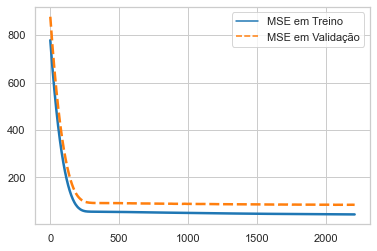

In [28]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [29]:
# flatten() --> cria um objeto unidimensional
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [30]:
# Imprime as previsões
previsoes

array([21.013786, 18.610012, 23.92799 , 21.417381, 20.693283, 20.788246,
       24.521515, 21.993103, 21.168102, 20.978176, 25.833206, 23.465042,
       21.375835, 22.78249 , 23.298855, 21.70821 , 26.966835, 23.393822,
       29.394352, 20.105694, 20.562706, 21.114685, 19.393463, 21.013786,
       19.167923, 23.548138, 22.924934, 14.615592, 17.452637, 35.08625 ,
       21.589504, 18.44976 , 20.153175, 22.859646, 31.465752, 24.331589,
       21.898136, 27.981762, 25.738243, 32.11863 , 27.56036 , 30.545792,
       31.988056, 17.452637, 23.11486 , 23.322598, 18.574398, 23.589684,
       37.03895 , 35.22276 , 18.378536, 34.623302, 31.026543, 25.89256 ,
       23.67871 , 22.859646, 26.100292, 27.803703, 24.729248, 24.355328,
       23.221695, 19.256954, 23.45317 , 22.865582, 21.209648, 20.366844,
       21.340225, 22.248318, 21.74382 , 21.654793, 27.020252, 24.842018,
       11.303723, 14.34257 , 17.369545, 23.393822, 17.743465, 18.206417,
       23.429428, 21.601376, 20.37278 , 25.934105, 

#### End.

#### Thank you.